In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 登月图片消噪

In [3]:
from scipy.fftpack import fft2

In [4]:
moon = plt.imread('data/moonlanding.png')

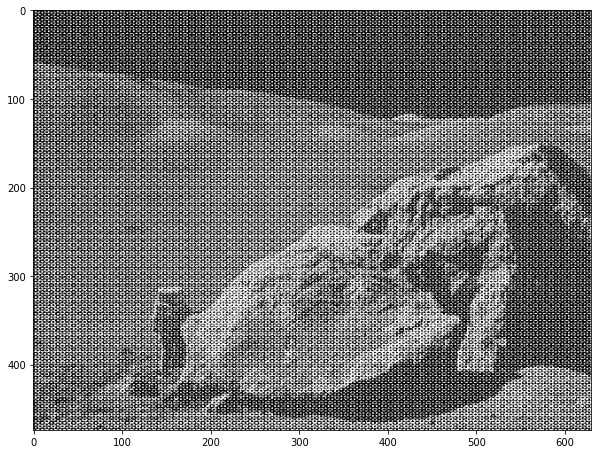

In [5]:
plt.figure(figsize=(10,8))
plt.imshow(moon, cmap='gray')

In [ ]:
# 第一步: 使用傅里叶变换,把图片变成频率
# 第二步,把高频点(噪点) 赋值为0
# 第三步, 进行傅里叶逆变换
# 第四步, 去虚保实

In [7]:
moon

array([[0.04705882, 0.        , 0.23921569, ..., 0.        , 0.00392157,
        0.53333336],
       [0.        , 0.        , 0.6784314 , ..., 0.10196079, 0.2901961 ,
        0.        ],
       [0.72156864, 0.10980392, 0.6039216 , ..., 0.        , 0.21568628,
        1.        ],
       ...,
       [0.00392157, 0.        , 1.        , ..., 1.        , 1.        ,
        0.95686275],
       [0.        , 0.        , 0.15686275, ..., 0.        , 0.        ,
        0.3529412 ],
       [1.        , 0.52156866, 0.04705882, ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

In [33]:
moon_fft = fft2(moon)
moon_fft

array([[126598.45      +0.j       ,  -4608.5796 -1892.4688j   ,
          -322.093    -20.27744j  , ...,   -906.1585 +1539.3081j   ,
          -322.093    +20.27744j  ,  -4608.5796 +1892.4688j   ],
       [ -9421.1    +5242.1133j   ,   5224.016  -3171.7434j   ,
          1607.9927 +1269.4243j   , ...,   -677.34503 -936.16174j  ,
           354.6247 -1003.8348j   ,   1965.366  -2188.0593j   ],
       [ -2928.3513 +7280.916j    ,  -1116.4065 +1338.3179j   ,
          -474.20056 +385.40216j  , ...,    239.7723  -977.2129j   ,
          1582.9283  -261.95346j  ,   2641.927   -292.09366j  ],
       ...,
       [  1850.5718 -2451.1787j   ,   -781.0807   +13.744501j ,
           377.90707  +12.6699295j, ...,  -1526.7869 +1271.2621j   ,
         -2705.5718 -3488.529j    ,   1897.404  -2281.9092j   ],
       [ -2928.3513 -7280.916j    ,   2641.927   +292.09366j  ,
          1582.9283  +261.95346j  , ...,  -2208.4302   +81.807434j ,
          -474.20056 -385.40216j  ,  -1116.4065 -1338.3179j   ]

In [18]:
# 绝对值大于某一频率(阈值)的点我们认为是高频点即噪点
moon_fft[np.abs(moon_fft) > 8e2] = 0

In [21]:
moon_fft

array([[126598.45      +0.j       ,  -4608.5796 -1892.4688j   ,
          -322.093    -20.27744j  , ...,   -906.1585 +1539.3081j   ,
          -322.093    +20.27744j  ,  -4608.5796 +1892.4688j   ],
       [ -9421.1    +5242.1133j   ,   5224.016  -3171.7434j   ,
          1607.9927 +1269.4243j   , ...,   -677.34503 -936.16174j  ,
           354.6247 -1003.8348j   ,   1965.366  -2188.0593j   ],
       [ -2928.3513 +7280.916j    ,  -1116.4065 +1338.3179j   ,
          -474.20056 +385.40216j  , ...,    239.7723  -977.2129j   ,
          1582.9283  -261.95346j  ,   2641.927   -292.09366j  ],
       ...,
       [  1850.5718 -2451.1787j   ,   -781.0807   +13.744501j ,
           377.90707  +12.6699295j, ...,  -1526.7869 +1271.2621j   ,
         -2705.5718 -3488.529j    ,   1897.404  -2281.9092j   ],
       [ -2928.3513 -7280.916j    ,   2641.927   +292.09366j  ,
          1582.9283  +261.95346j  , ...,  -2208.4302   +81.807434j ,
          -474.20056 -385.40216j  ,  -1116.4065 -1338.3179j   ]

In [34]:
result = np.where(np.abs(moon_fft) > 8e3, 0, moon_fft)
result

array([[    0.        +0.j       , -4608.5796 -1892.4688j   ,
         -322.093    -20.27744j  , ...,  -906.1585 +1539.3081j   ,
         -322.093    +20.27744j  , -4608.5796 +1892.4688j   ],
       [    0.        +0.j       ,  5224.016  -3171.7434j   ,
         1607.9927 +1269.4243j   , ...,  -677.34503 -936.16174j  ,
          354.6247 -1003.8348j   ,  1965.366  -2188.0593j   ],
       [-2928.3513 +7280.916j    , -1116.4065 +1338.3179j   ,
         -474.20056 +385.40216j  , ...,   239.7723  -977.2129j   ,
         1582.9283  -261.95346j  ,  2641.927   -292.09366j  ],
       ...,
       [ 1850.5718 -2451.1787j   ,  -781.0807   +13.744501j ,
          377.90707  +12.6699295j, ..., -1526.7869 +1271.2621j   ,
        -2705.5718 -3488.529j    ,  1897.404  -2281.9092j   ],
       [-2928.3513 -7280.916j    ,  2641.927   +292.09366j  ,
         1582.9283  +261.95346j  , ..., -2208.4302   +81.807434j ,
         -474.20056 -385.40216j  , -1116.4065 -1338.3179j   ],
       [    0.        +0.j  

In [ ]:
np.argwhere()

In [11]:
# 逆变换
from scipy.fftpack import ifft2

In [35]:
moon_ifft = ifft2(result)
moon_ifft

array([[-0.31247804-1.57183900e-18j, -0.11736775-3.14415123e-17j,
        -0.21499726+4.54178611e-18j, ..., -0.15360704-3.12182198e-17j,
        -0.26249582+9.85926564e-17j, -0.06917886-4.20639440e-17j],
       [ 0.30835733-4.01409162e-18j,  0.21523796-4.27151370e-17j,
         0.00772618+3.69238503e-17j, ..., -0.28246835+1.95045244e-16j,
        -0.19286627+1.66060386e-16j, -0.27014625+3.12136935e-16j],
       [ 0.02938785-1.71038352e-17j, -0.28193107+3.61345711e-17j,
        -0.0298173 +4.13302034e-18j, ..., -0.33066782+1.76521891e-16j,
        -0.2306113 +1.42875612e-16j,  0.1225644 -1.44499533e-16j],
       ...,
       [-0.04944554-3.70412140e-18j, -0.13663577+5.81152879e-17j,
        -0.0063614 +2.98673181e-17j, ...,  0.28033933-1.30847466e-16j,
         0.1813402 -2.91812677e-17j,  0.33493498-2.16250039e-16j],
       [-0.02948882+3.87376953e-17j,  0.15544556-4.75668846e-18j,
        -0.11876445+5.08334382e-17j, ...,  0.02251144-2.25471204e-17j,
        -0.08817295+1.02938663e-16j

In [36]:
# 去虚保实
moon_cleaned = np.real(moon_ifft)

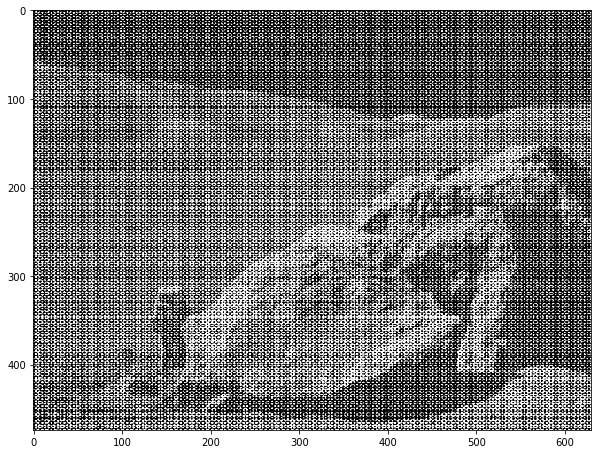

In [15]:
plt.figure(figsize=(10,8))
plt.imshow(moon, cmap='gray')

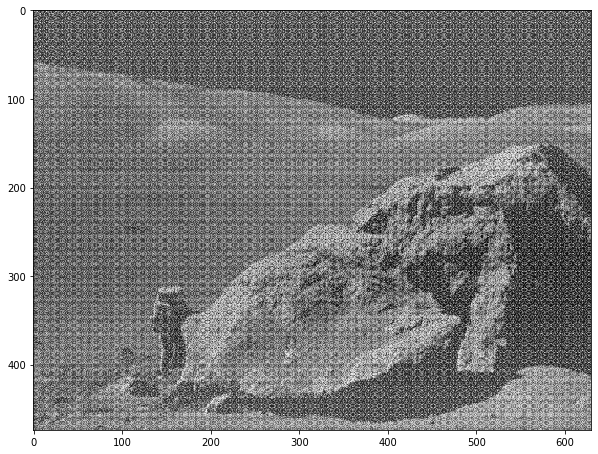

In [37]:
plt.figure(figsize=(10,8))
plt.imshow(moon_cleaned, cmap='gray')

scipy.fftpack模块用来计算快速傅里叶变换  
速度比传统傅里叶变换更快，是对之前算法的改进  
图片是二维数据，注意使用fftpack的二维转变方法

### 数值积分，求解圆周率
求解圆周率  

integrate
对函数(1 - x^2)^0.5进行积分 

In [38]:
np.pi

3.141592653589793

In [ ]:
S = pi * r^2
S = pi

In [ ]:
求半径是1的圆的面积.
让圆的圆心在原点处 

In [ ]:
(x - a)^2 + (y - b)^2 = r^2

In [ ]:
x^2 + y^2 = 1

In [ ]:
y = (1 - x ^2 )^0.5

(-1.1, 1.1, -1.0999438818457405, 1.0999438818457405)

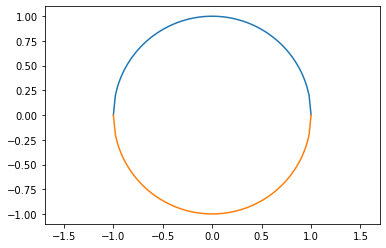

In [41]:
x = np.linspace(-1,1, 100)
y = (1 - x**2)**0.5
plt.plot(x, y, x, -y)
plt.axis('equal')

X**2 + Y**2 = 1,半径是1  
pi×r**2,只要求得面积--->pi

In [42]:
from scipy import integrate

首先画一个圆

圆的面积是？

使用scipy.integrate进行积分，调用quad()方法

In [44]:
f = lambda x: (1 - x**2)**0.5

In [46]:
half_pi, deviation = integrate.quad(f, -1, 1)

In [47]:
half_pi * 2

3.1415926535897967

In [50]:
half_pi

1.5707963267948983

In [48]:
np.pi

3.141592653589793

In [49]:
deviation

1.0002354500215915e-09

### Scipy文件输入/输出


随机生成数组，使用scipy中的io.savemat()保存  
文件格式是.mat，标准的二进制文件

In [ ]:
.mat

In [51]:
import  scipy.io as spio

In [52]:
spio.savemat('./moon.mat', {'moon': moon_cleaned})

使用io.loadmat()读取数据

In [53]:
data = spio.loadmat('./moon.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Fri Aug  9 11:20:09 2019',
 '__version__': '1.0',
 '__globals__': [],
 'moon': array([[-0.31247804, -0.11736775, -0.21499726, ..., -0.15360704,
         -0.26249582, -0.06917886],
        [ 0.30835733,  0.21523796,  0.00772618, ..., -0.28246835,
         -0.19286627, -0.27014625],
        [ 0.02938785, -0.28193107, -0.0298173 , ..., -0.33066782,
         -0.2306113 ,  0.1225644 ],
        ...,
        [-0.04944554, -0.13663577, -0.0063614 , ...,  0.28033933,
          0.1813402 ,  0.33493498],
        [-0.02948882,  0.15544556, -0.11876445, ...,  0.02251144,
         -0.08817295,  0.02270642],
        [-0.03088031,  0.06871594, -0.19320534, ...,  0.07467041,
         -0.05269641,  0.06164517]], dtype=float32)}

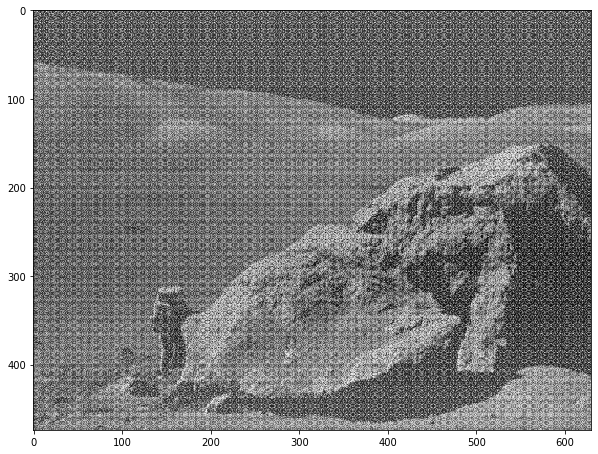

In [54]:
plt.figure(figsize=(10,8))
plt.imshow(data['moon'], cmap='gray')

In [55]:
from scipy  import misc

In [56]:
misc.imread('../data/moonlanding.png')

AttributeError: module 'scipy.misc' has no attribute 'imread'

In [57]:
# 滤镜效果
misc.imfilter()

AttributeError: module 'scipy.misc' has no attribute 'imfilter'

In [58]:
from PIL import Image, ImageFilter

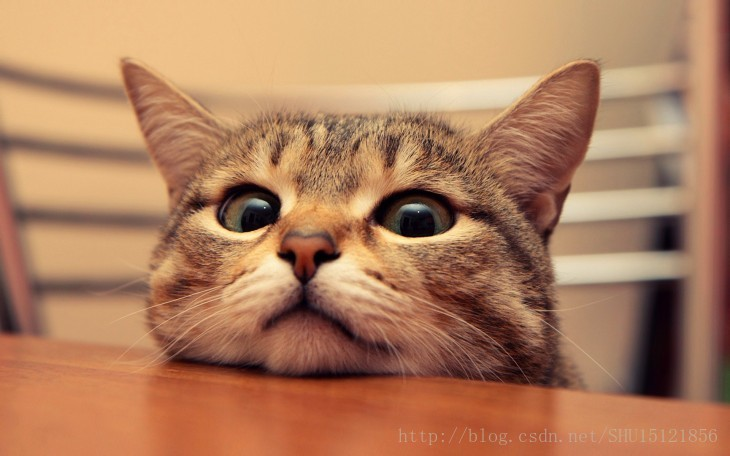

In [59]:
cat = Image.open('../data/cat.jpg')
cat

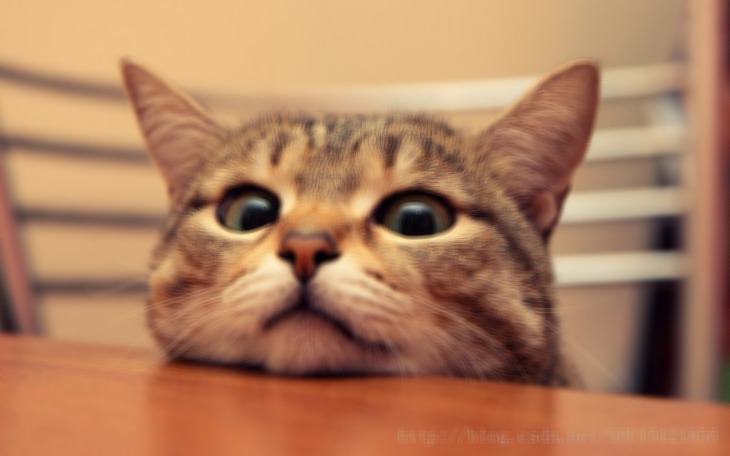

In [71]:
# 各种滤镜效果
cat.filter(ImageFilter.BLUR)

### 图片处理

使用scipy.misc.face(gray=True)获取图片，使用ndimage移动坐标、旋转图片、切割图片、缩放图片

In [72]:
from scipy import ndimage

导包，读取图片显示图片

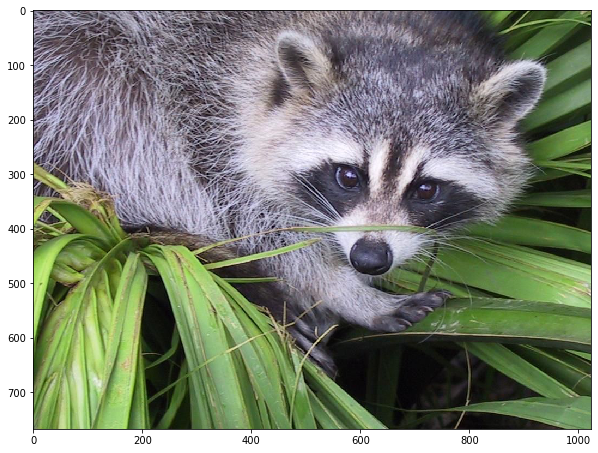

In [73]:
face = misc.face()
plt.figure(figsize=(10,8))
plt.imshow(face)

shift移动坐标

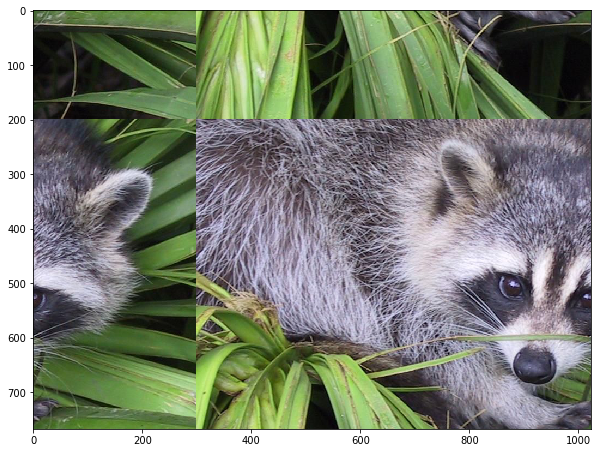

In [80]:
# {'reflect', 'constant', 'nearest', 'mirror', 'wrap'}
face_shift = ndimage.shift(face, (200, 300, 0), mode='wrap')
plt.figure(figsize=(10,8))
plt.imshow(face_shift)

rotate旋转图片

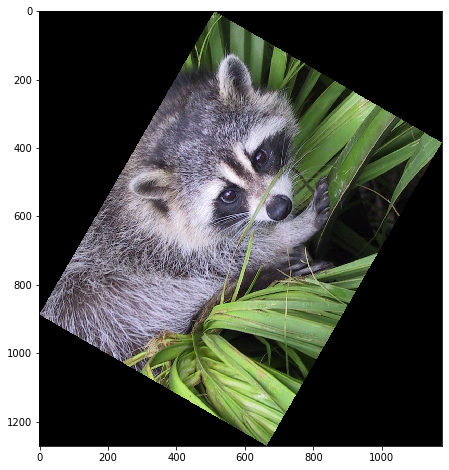

In [84]:
face_rotate = ndimage.rotate(face, angle=60)
plt.figure(figsize=(10,8))
plt.imshow(face_rotate)

zoom缩放图片

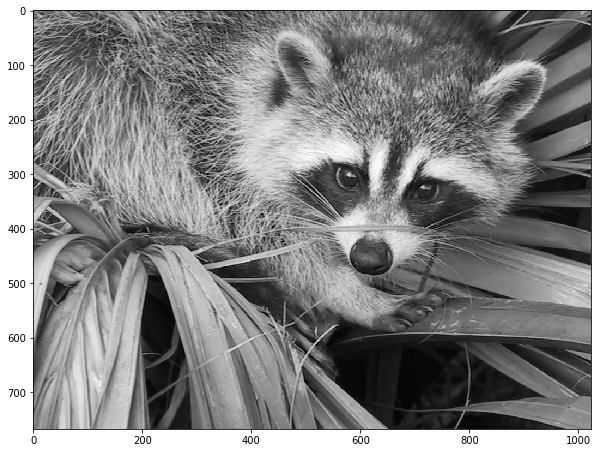

In [85]:
face = misc.face(gray=True)
plt.figure(figsize=(10,8))
plt.imshow(face, cmap='gray')

d:\1903\.venv\lib\site-packages\scipy\ndimage\interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


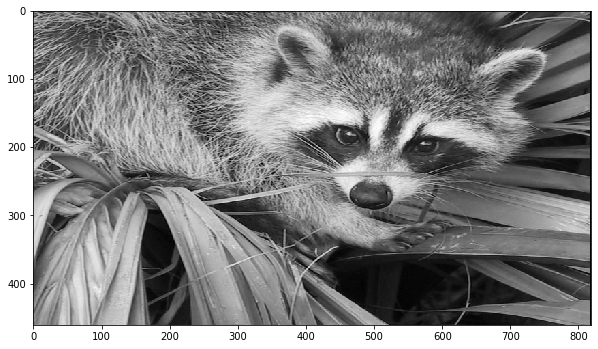

In [87]:
face_zoom = ndimage.zoom(face, zoom=(0.6, 0.8))
plt.figure(figsize=(10,8))
plt.imshow(face_zoom, cmap='gray')

切割图片

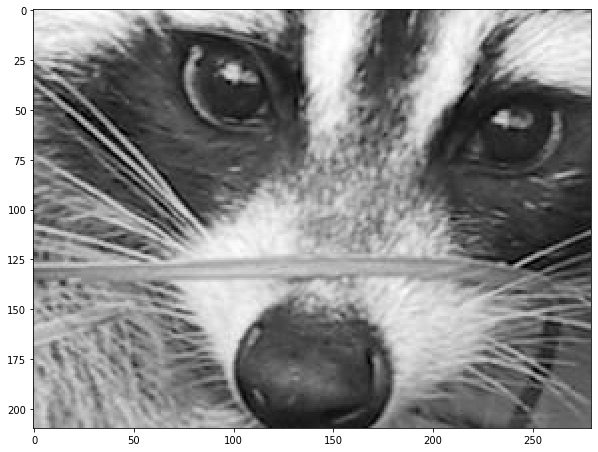

In [88]:
face_cut = face[270:480, 480:760]
plt.figure(figsize=(10,8))
plt.imshow(face_cut, cmap='gray')

图片进行过滤   
添加噪声，对噪声图片使用ndimage中的高斯滤波、中值滤波、signal中维纳滤波进行处理  
使图片变清楚

In [98]:
face_noise = face.copy()

In [99]:
face_noise = face_noise.astype('float64')

In [100]:
face_noise += np.random.randn(*face_noise.shape) * face_noise.std() * 0.5

In [92]:
face_noise.std()

54.721679908790065

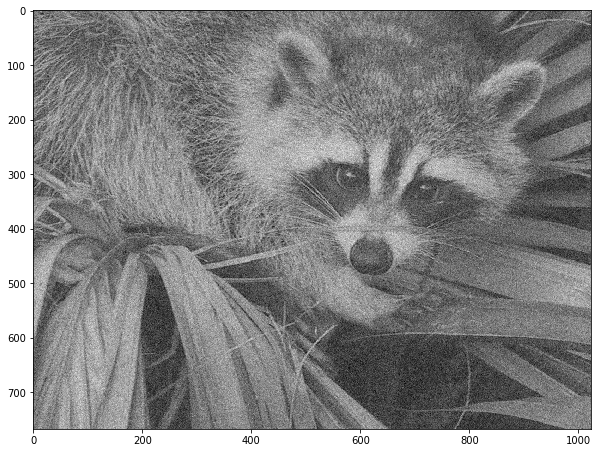

In [101]:
face = misc.face(gray=True)
plt.figure(figsize=(10,8))
plt.imshow(face_noise, cmap='gray')

加载图片，使用灰色图片misc.face()添加噪声

高斯滤波sigma：高斯核的标准偏差

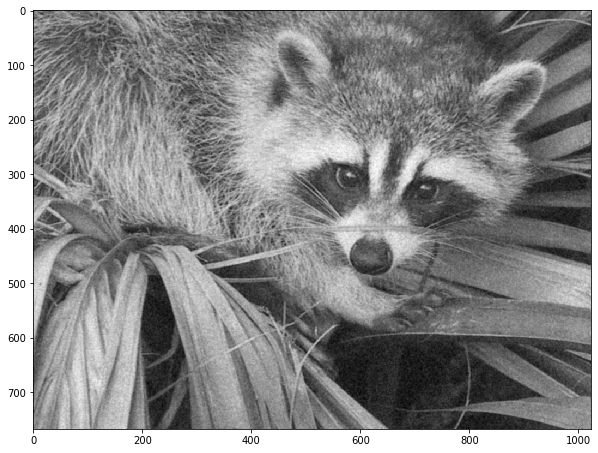

In [105]:
face_gaussian = ndimage.gaussian_filter(face_noise, sigma=1)
plt.figure(figsize=(10,8))
plt.imshow(face_gaussian, cmap='gray')

中值滤波参数size：给出在每个元素上从输入数组中取出的形状位置，定义过滤器功能的输入

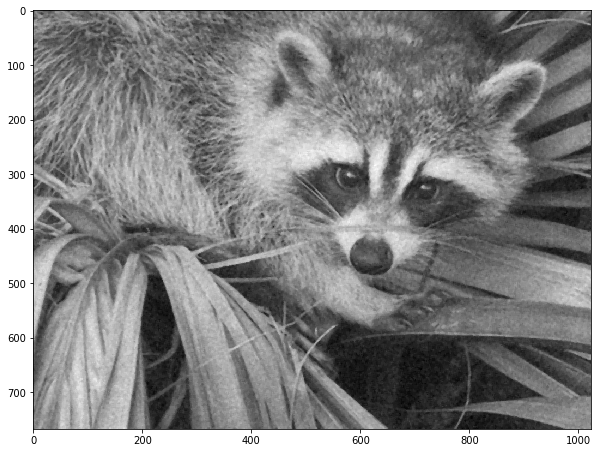

In [110]:
face_median = ndimage.median_filter(face_noise, size=5)
plt.figure(figsize=(10,8))
plt.imshow(face_median, cmap='gray')

signal维纳滤波mysize：滤镜尺寸的标量

In [111]:
from scipy import signal

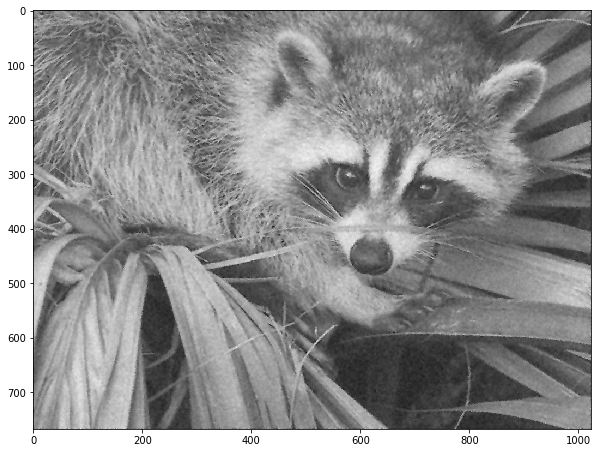

In [116]:
face_wiener = signal.wiener(face_noise, mysize=5)
plt.figure(figsize=(10,8))
plt.imshow(face_wiener, cmap='gray')

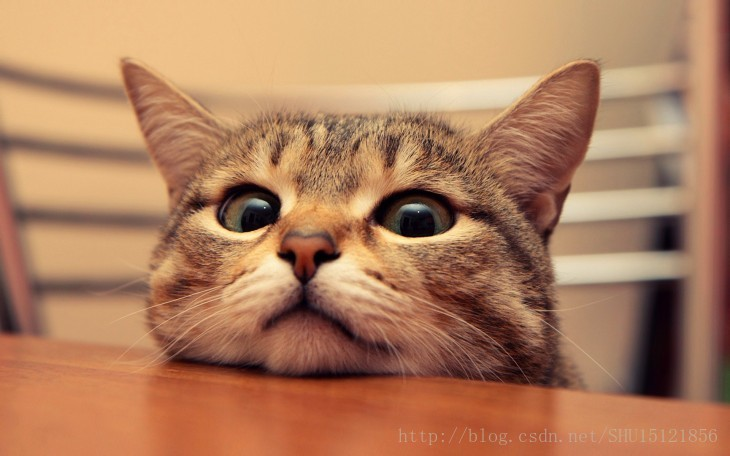

In [117]:
cat

In [118]:
cat = plt.imread('../data/cat.jpg')

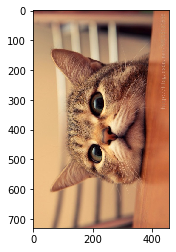

In [119]:
cat_rotate = ndimage.rotate(cat, angle=90)
plt.imshow(cat_rotate)